In [1]:
import good_sorts
import matplotlib.pyplot as plt
import time
from bad_sorts import create_random_list

# author: Yashasvi Seth

In [2]:
# A better implementation of quicksort with 2 pivot values

def dual_quicksort(arr):
    if len(arr) < 2:
        return arr
    if len(arr) == 2:
        if arr[0] > arr[1]:
            return [arr[1], arr[0]]
        else:
            return arr
    
    piv1, piv2 = arr[0], arr[1]
    if piv1 > piv2:   
        piv1, piv2 = piv2, piv1  # making sure that the pivots are in order
    
    subarr1 = []
    subarr2 = []
    subarr3 = []

    for i in arr[2:]:  # dividing values into 3 subarrays
        if i < piv1:
            subarr1.append(i)
        elif i > piv2:
            subarr3.append(i)
        else:
            subarr2.append(i)
    
    return dual_quicksort(subarr1) + [piv1] + dual_quicksort(subarr2) + [piv2] + dual_quicksort(subarr3)


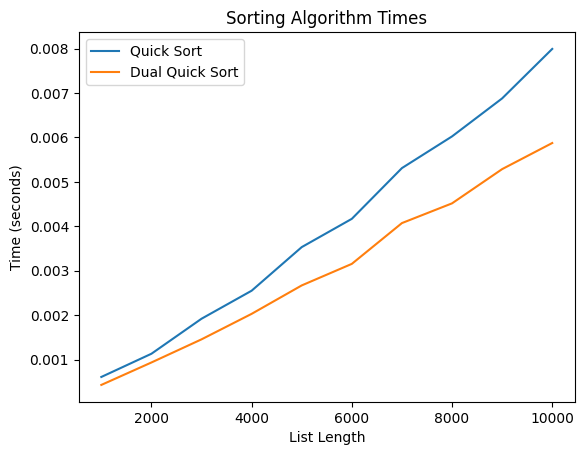

In [7]:
# Times for quicksort and dual_quicksort

lengths = [n for n in range(1000, 10001, 1000)]  # from 1000 to 10000 in steps of 1000
runs = 25

quick_times = [0] * len(lengths)
dualquick_times = [0] * len(lengths)

for _ in range(runs):
    for i, n in enumerate(lengths):
        lst = create_random_list(n, 512)

        start = time.time()
        good_sorts.quicksort(lst.copy())
        end = time.time()
        quick_times[i] += end - start

        start = time.time()
        dual_quicksort(lst.copy())
        end = time.time()
        dualquick_times[i] += end - start

# Average the times over the runs
quick_times = [t / runs for t in quick_times]
dualquick_times = [t / runs for t in dualquick_times]

# plot 2 algorithms into one graph
plt.plot(lengths, quick_times, label='Quick Sort')
plt.plot(lengths, dualquick_times, label='Dual Quick Sort')
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Times')
plt.legend()
plt.show()